# Employee Turnover Analytics - Course-end Project 3

## Project Overview

Portobello Tech is an app innovator who has devised an intelligent way of predicting employee turnover within the company. This notebook performs comprehensive analysis of employee turnover data including:

1. **Data Quality Checks** - Checking for missing values and data integrity
2. **Exploratory Data Analysis (EDA)** - Understanding factors contributing to turnover
3. **Clustering Analysis** - Grouping employees who left based on satisfaction and evaluation
4. **Class Imbalance Handling** - Using SMOTE technique
5. **Model Training** - K-fold cross-validation with multiple algorithms
6. **Model Evaluation** - Performance comparison and best model identification
7. **Retention Strategies** - Targeted recommendations for HR

---
**Student:** Tatpar Mishra  
**Course:** Data Science/ML Course  
**Date:** July 2025

## 1. Import Libraries and Setup

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('dataset/HR_comma_sep.csv')

print("=" * 60)
print("EMPLOYEE TURNOVER ANALYTICS")
print("=" * 60)
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display first few rows
df.head()

EMPLOYEE TURNOVER ANALYTICS
Dataset loaded successfully!
Shape: (14999, 10)
Columns: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 3. Data Quality Checks

In [3]:
print("=" * 60)
print("DATA QUALITY CHECKS")
print("=" * 60)

# Check for missing values
print("\n1. Missing Values Check:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset")
else:
    print("✗ Missing values found:")
    print(missing_values[missing_values > 0])

# Check data types
print("\n2. Data Types:")
print(df.dtypes)

# Check for duplicates
print(f"\n3. Duplicate Rows: {df.duplicated().sum()}")

# Basic statistics
print("\n4. Basic Statistics:")
df.describe()

DATA QUALITY CHECKS

1. Missing Values Check:
✓ No missing values found in the dataset

2. Data Types:
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

3. Duplicate Rows: 3008

4. Basic Statistics:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


5. Target Variable Distribution (left):
left
0    11428
1     3571
Name: count, dtype: int64
Turnover Rate: 23.81%


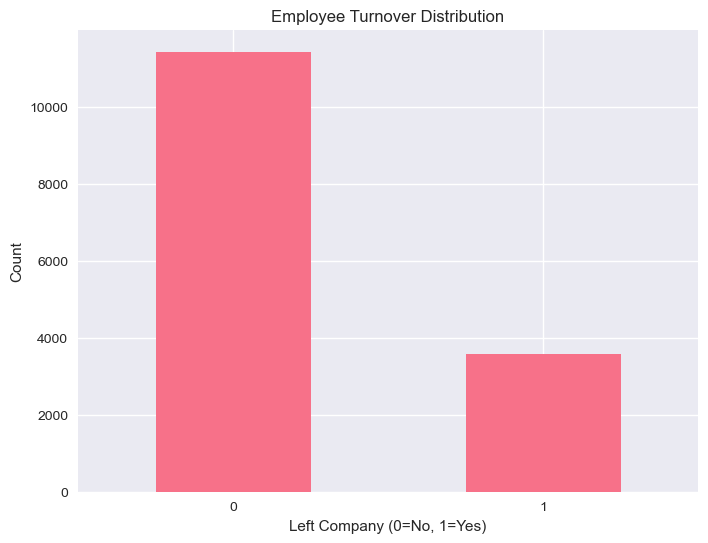

In [4]:
# Check target variable distribution
print("5. Target Variable Distribution (left):")
print(df['left'].value_counts())
print(f"Turnover Rate: {df['left'].mean():.2%}")

# Visualize target distribution
plt.figure(figsize=(8, 6))
df['left'].value_counts().plot(kind='bar')
plt.title('Employee Turnover Distribution')
plt.xlabel('Left Company (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 4. Exploratory Data Analysis (EDA)

EXPLORATORY DATA ANALYSIS


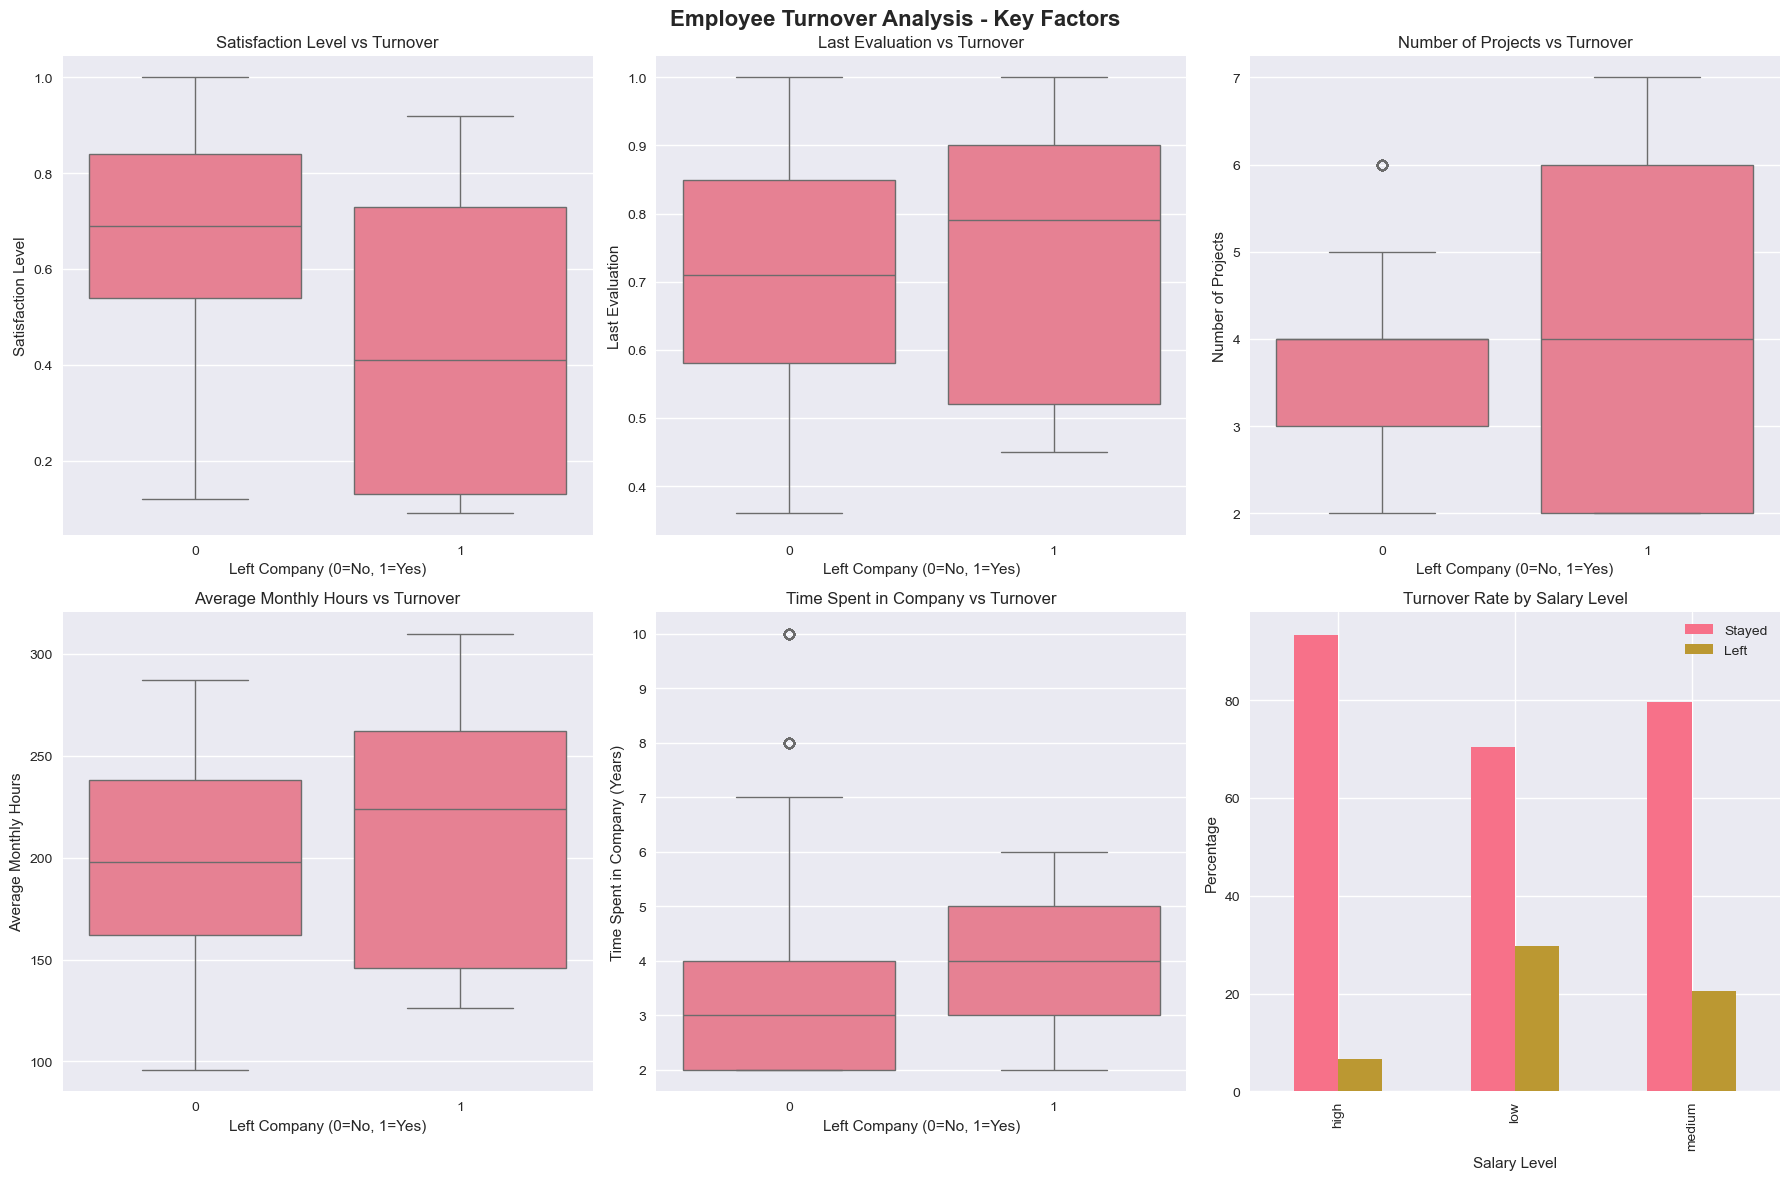

In [5]:
print("=" * 60)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# Create figure for EDA plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Employee Turnover Analysis - Key Factors', fontsize=16, fontweight='bold')

# 1. Satisfaction Level vs Turnover
sns.boxplot(data=df, x='left', y='satisfaction_level', ax=axes[0,0])
axes[0,0].set_title('Satisfaction Level vs Turnover')
axes[0,0].set_xlabel('Left Company (0=No, 1=Yes)')
axes[0,0].set_ylabel('Satisfaction Level')

# 2. Last Evaluation vs Turnover
sns.boxplot(data=df, x='left', y='last_evaluation', ax=axes[0,1])
axes[0,1].set_title('Last Evaluation vs Turnover')
axes[0,1].set_xlabel('Left Company (0=No, 1=Yes)')
axes[0,1].set_ylabel('Last Evaluation')

# 3. Number of Projects vs Turnover
sns.boxplot(data=df, x='left', y='number_project', ax=axes[0,2])
axes[0,2].set_title('Number of Projects vs Turnover')
axes[0,2].set_xlabel('Left Company (0=No, 1=Yes)')
axes[0,2].set_ylabel('Number of Projects')

# 4. Average Monthly Hours vs Turnover
sns.boxplot(data=df, x='left', y='average_montly_hours', ax=axes[1,0])
axes[1,0].set_title('Average Monthly Hours vs Turnover')
axes[1,0].set_xlabel('Left Company (0=No, 1=Yes)')
axes[1,0].set_ylabel('Average Monthly Hours')

# 5. Time Spent in Company vs Turnover
sns.boxplot(data=df, x='left', y='time_spend_company', ax=axes[1,1])
axes[1,1].set_title('Time Spent in Company vs Turnover')
axes[1,1].set_xlabel('Left Company (0=No, 1=Yes)')
axes[1,1].set_ylabel('Time Spent in Company (Years)')

# 6. Salary Distribution by Turnover
salary_turnover = pd.crosstab(df['salary'], df['left'], normalize='index') * 100
salary_turnover.plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Turnover Rate by Salary Level')
axes[1,2].set_xlabel('Salary Level')
axes[1,2].set_ylabel('Percentage')
axes[1,2].legend(['Stayed', 'Left'])

plt.tight_layout()
plt.show()

6. Correlation Analysis:


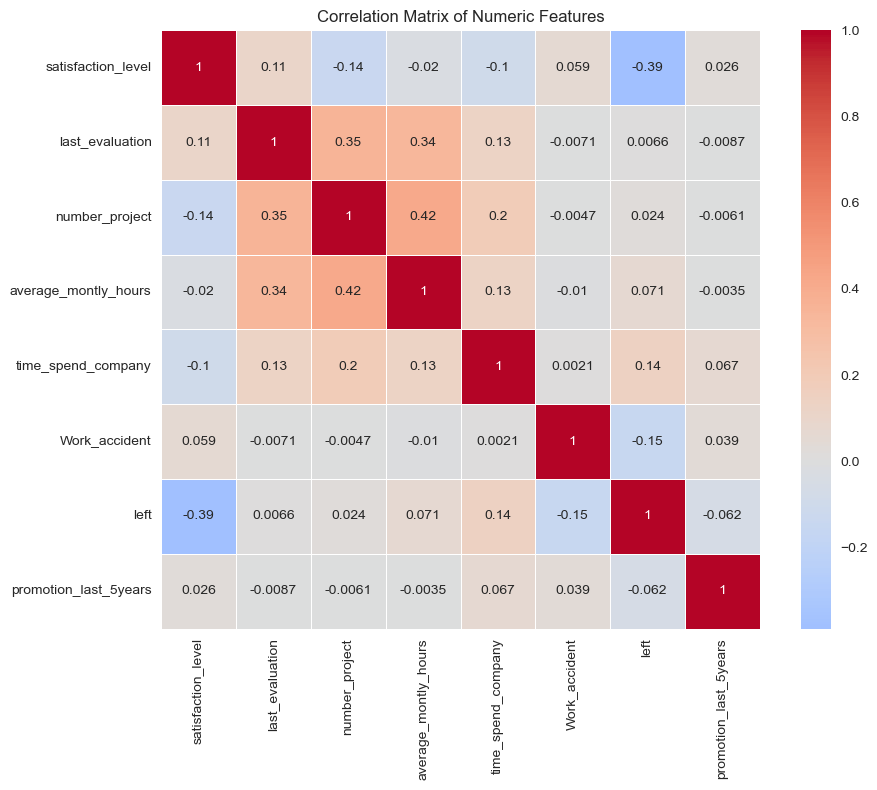

In [6]:
# Correlation analysis
print("6. Correlation Analysis:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

In [7]:
# Key insights from EDA
print("7. Key Insights from EDA:")
print("-" * 40)

# Satisfaction level analysis
avg_satisfaction_left = df[df['left'] == 1]['satisfaction_level'].mean()
avg_satisfaction_stayed = df[df['left'] == 0]['satisfaction_level'].mean()
print(f"Average satisfaction level for employees who left: {avg_satisfaction_left:.3f}")
print(f"Average satisfaction level for employees who stayed: {avg_satisfaction_stayed:.3f}")

# Work hours analysis
avg_hours_left = df[df['left'] == 1]['average_montly_hours'].mean()
avg_hours_stayed = df[df['left'] == 0]['average_montly_hours'].mean()
print(f"Average monthly hours for employees who left: {avg_hours_left:.1f}")
print(f"Average monthly hours for employees who stayed: {avg_hours_stayed:.1f}")

# Department analysis
dept_turnover = df.groupby('sales')['left'].mean().sort_values(ascending=False)
print(f"\nTurnover rate by department:")
for dept, rate in dept_turnover.items():
    print(f"  {dept}: {rate:.2%}")

7. Key Insights from EDA:
----------------------------------------
Average satisfaction level for employees who left: 0.440
Average satisfaction level for employees who stayed: 0.667
Average monthly hours for employees who left: 207.4
Average monthly hours for employees who stayed: 199.1

Turnover rate by department:
  hr: 29.09%
  accounting: 26.60%
  technical: 25.62%
  support: 24.90%
  sales: 24.49%
  marketing: 23.66%
  IT: 22.25%
  product_mng: 21.95%
  RandD: 15.37%
  management: 14.44%


## 5. Clustering Analysis - Employees Who Left

In [8]:
print("=" * 60)
print("CLUSTERING ANALYSIS - EMPLOYEES WHO LEFT")
print("=" * 60)

# Filter employees who left
employees_left = df[df['left'] == 1].copy()
print(f"Number of employees who left: {len(employees_left)}")

# Select features for clustering
clustering_features = ['satisfaction_level', 'last_evaluation', 'number_project', 
                     'average_montly_hours', 'time_spend_company']

X_cluster = employees_left[clustering_features]

# Standardize features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

CLUSTERING ANALYSIS - EMPLOYEES WHO LEFT
Number of employees who left: 3571


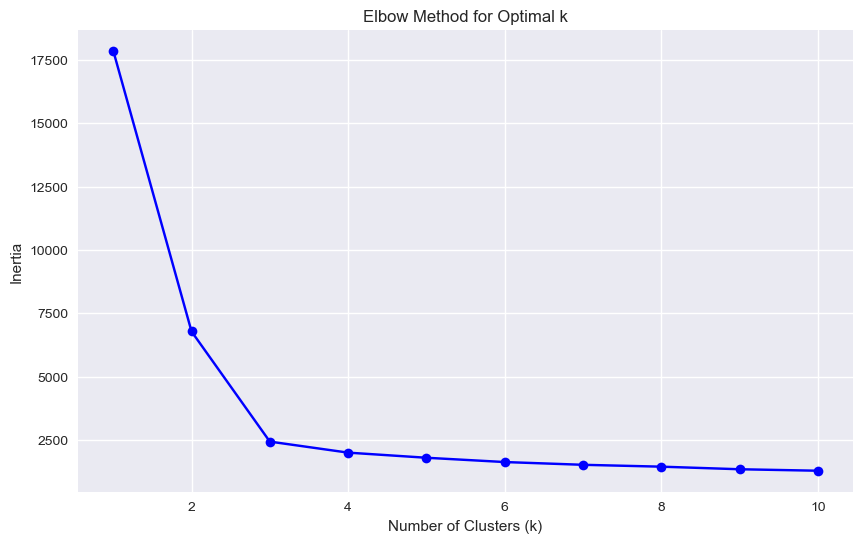

Optimal number of clusters: 3


In [9]:
# Determine optimal number of clusters using elbow method
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on elbow curve, choose k=3
optimal_k = 3
print(f"Optimal number of clusters: {optimal_k}")

In [10]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
employees_left['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Analyze clusters
print("\nCluster Analysis:")
print("-" * 40)

cluster_analysis = employees_left.groupby('cluster')[clustering_features].mean()
print(cluster_analysis)


Cluster Analysis:
----------------------------------------
         satisfaction_level  last_evaluation  number_project  \
cluster                                                        
0                  0.413875         0.522784        2.121892   
1                  0.119917         0.859948        6.152648   
2                  0.806705         0.911554        4.529718   

         average_montly_hours  time_spend_company  
cluster                                            
0                  148.565797            3.010916  
1                  273.143302            4.083074  
2                  242.619395            5.157456  


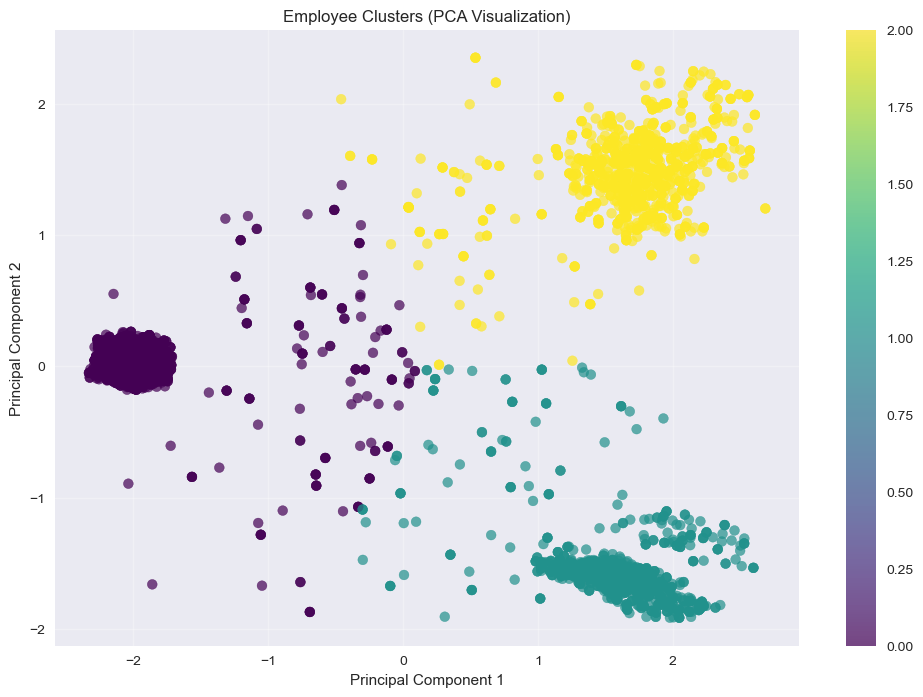

In [11]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(12, 8))

# Plot clusters
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=employees_left['cluster'], 
                    cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Employee Clusters (PCA Visualization)')
plt.grid(True, alpha=0.3)
plt.show()

In [12]:
# Cluster profiles
print("\nCluster Profiles:")
print("-" * 40)

for cluster_id in range(optimal_k):
    cluster_data = employees_left[employees_left['cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} ({len(cluster_data)} employees):")
    print(f"  Average satisfaction: {cluster_data['satisfaction_level'].mean():.3f}")
    print(f"  Average evaluation: {cluster_data['last_evaluation'].mean():.3f}")
    print(f"  Average projects: {cluster_data['number_project'].mean():.1f}")
    print(f"  Average hours: {cluster_data['average_montly_hours'].mean():.1f}")
    print(f"  Average tenure: {cluster_data['time_spend_company'].mean():.1f} years")


Cluster Profiles:
----------------------------------------

Cluster 0 (1649 employees):
  Average satisfaction: 0.414
  Average evaluation: 0.523
  Average projects: 2.1
  Average hours: 148.6
  Average tenure: 3.0 years

Cluster 1 (963 employees):
  Average satisfaction: 0.120
  Average evaluation: 0.860
  Average projects: 6.2
  Average hours: 273.1
  Average tenure: 4.1 years

Cluster 2 (959 employees):
  Average satisfaction: 0.807
  Average evaluation: 0.912
  Average projects: 4.5
  Average hours: 242.6
  Average tenure: 5.2 years


## 6. Data Preparation for Modeling

In [13]:
print("=" * 60)
print("DATA PREPARATION FOR MODELING")
print("=" * 60)

# Create a copy for encoding
df_encoded = df.copy()

# Encode categorical variables
le_sales = LabelEncoder()
le_salary = LabelEncoder()

df_encoded['sales_encoded'] = le_sales.fit_transform(df_encoded['sales'])
df_encoded['salary_encoded'] = le_salary.fit_transform(df_encoded['salary'])

# Select features for modeling
feature_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
                  'average_montly_hours', 'time_spend_company', 'Work_accident',
                  'promotion_last_5years', 'sales_encoded', 'salary_encoded']

X = df_encoded[feature_columns]
y = df_encoded['left']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Class distribution: {y.value_counts().to_dict()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

DATA PREPARATION FOR MODELING
Features shape: (14999, 9)
Target shape: (14999,)
Class distribution: {0: 11428, 1: 3571}
Training set shape: (11999, 9)
Test set shape: (3000, 9)


## 7. Handling Class Imbalance with SMOTE

In [14]:
print("=" * 60)
print("HANDLING CLASS IMBALANCE WITH SMOTE")
print("=" * 60)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Original training set class distribution:")
print(y_train.value_counts())

print(f"\nBalanced training set class distribution:")
print(pd.Series(y_train_balanced).value_counts())

# Update training data
X_train = X_train_balanced
y_train = y_train_balanced

HANDLING CLASS IMBALANCE WITH SMOTE
Original training set class distribution:
left
0    9142
1    2857
Name: count, dtype: int64

Balanced training set class distribution:
left
0    9142
1    9142
Name: count, dtype: int64


## 8. Model Training with K-Fold Cross-Validation

In [15]:
print("=" * 60)
print("MODEL TRAINING WITH K-FOLD CROSS-VALIDATION")
print("=" * 60)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

# K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

print("Performing 5-fold cross-validation...")
print("-" * 50)

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, 
                              cv=kfold, scoring='accuracy')
    
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Train on full training set
    model.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

MODEL TRAINING WITH K-FOLD CROSS-VALIDATION
Performing 5-fold cross-validation...
--------------------------------------------------

Training Logistic Regression...
Cross-validation accuracy: 0.7695 (+/- 0.0076)

Training Random Forest...
Cross-validation accuracy: 0.9832 (+/- 0.0022)

Training Gradient Boosting...
Cross-validation accuracy: 0.9580 (+/- 0.0075)

Training SVM...
Cross-validation accuracy: 0.6962 (+/- 0.0194)


## 9. Model Evaluation and Comparison

In [16]:
print("=" * 60)
print("MODEL EVALUATION AND COMPARISON")
print("=" * 60)

# Create results DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.round(4))

MODEL EVALUATION AND COMPARISON

Model Performance Comparison:
                     accuracy  precision  recall      f1  roc_auc  cv_mean  \
Logistic Regression    0.7597     0.4968  0.7619  0.6014   0.8192   0.7695   
Random Forest          0.9873     0.9774  0.9692  0.9733   0.9921   0.9832   
Gradient Boosting      0.9667     0.9205  0.9412  0.9307   0.9885   0.9580   
SVM                    0.6873     0.4097  0.7115  0.5200   0.7638   0.6962   

                     cv_std  
Logistic Regression  0.0038  
Random Forest        0.0011  
Gradient Boosting    0.0037  
SVM                  0.0097  


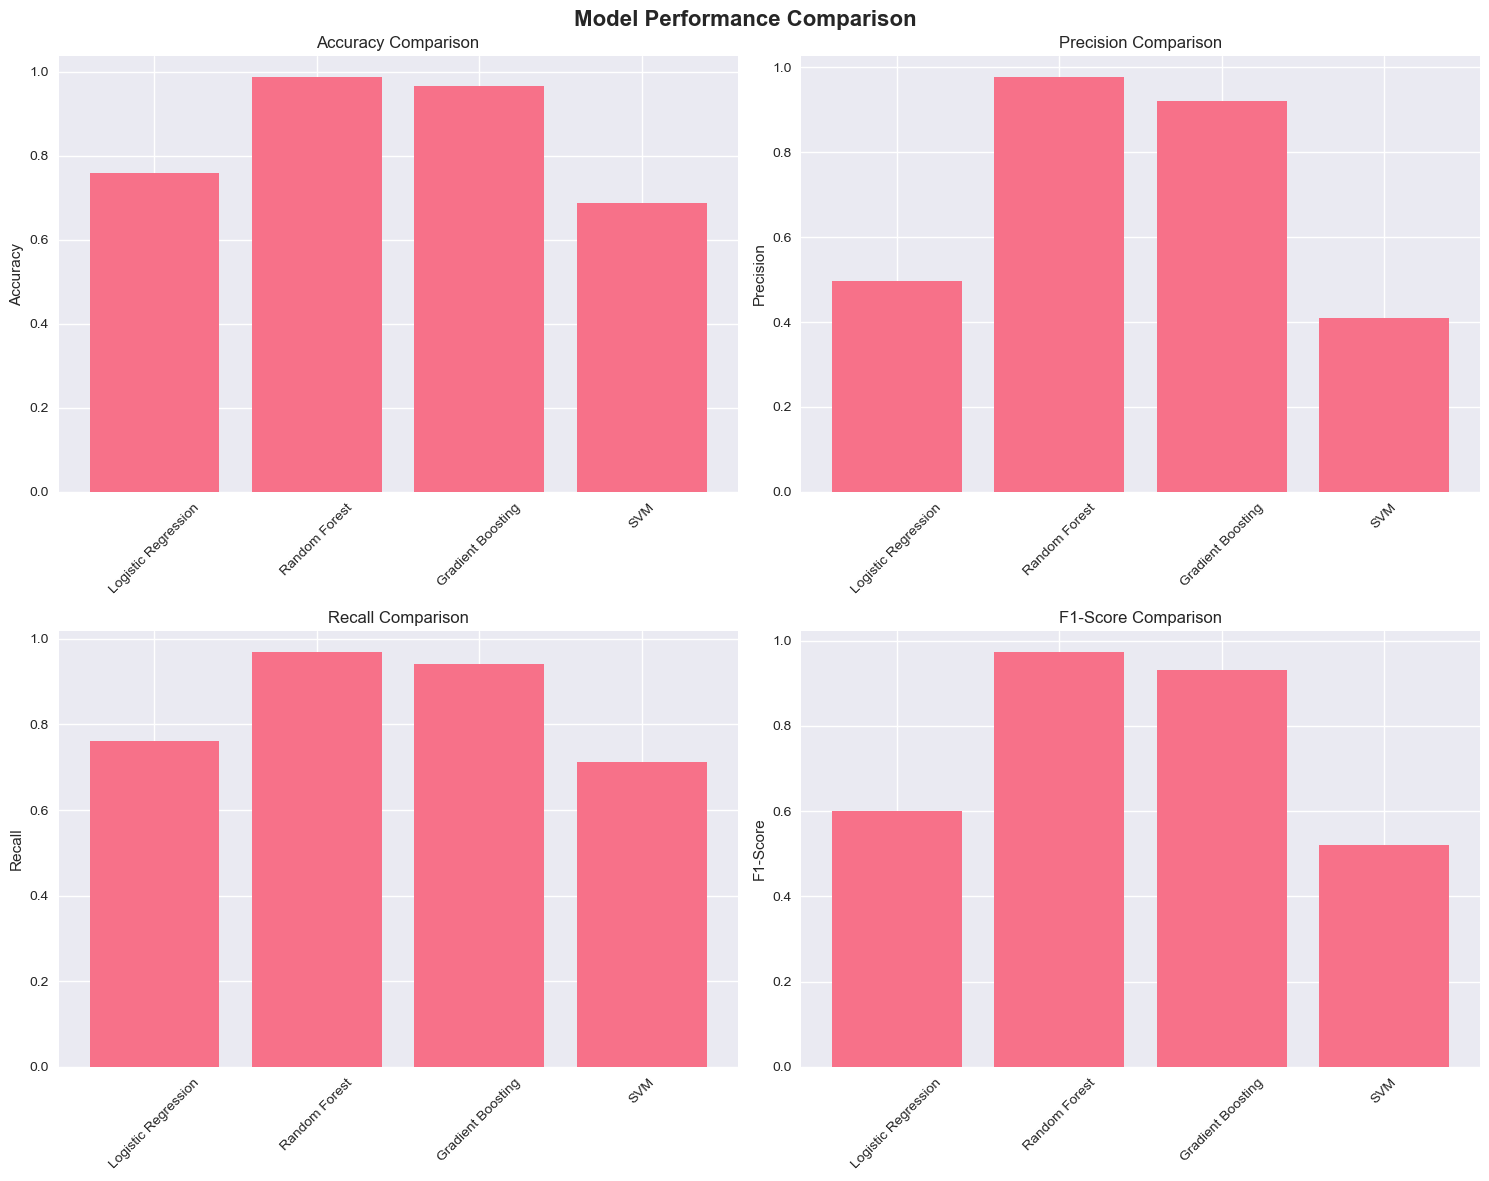

In [17]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Accuracy comparison
axes[0,0].bar(results_df.index, results_df['accuracy'])
axes[0,0].set_title('Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# Precision comparison
axes[0,1].bar(results_df.index, results_df['precision'])
axes[0,1].set_title('Precision Comparison')
axes[0,1].set_ylabel('Precision')
axes[0,1].tick_params(axis='x', rotation=45)

# Recall comparison
axes[1,0].bar(results_df.index, results_df['recall'])
axes[1,0].set_title('Recall Comparison')
axes[1,0].set_ylabel('Recall')
axes[1,0].tick_params(axis='x', rotation=45)

# F1-Score comparison
axes[1,1].bar(results_df.index, results_df['f1'])
axes[1,1].set_title('F1-Score Comparison')
axes[1,1].set_ylabel('F1-Score')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# Find best model
best_model_name = results_df['f1'].idxmax()
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"F1-Score: {results_df.loc[best_model_name, 'f1']:.4f}")
print(f"Accuracy: {results_df.loc[best_model_name, 'accuracy']:.4f}")
print(f"Precision: {results_df.loc[best_model_name, 'precision']:.4f}")
print(f"Recall: {results_df.loc[best_model_name, 'recall']:.4f}")

# Detailed analysis of best model
print(f"\nDetailed Analysis of {best_model_name}:")
print("-" * 40)

y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Best Model: Random Forest
F1-Score: 0.9733
Accuracy: 0.9873
Precision: 0.9774
Recall: 0.9692

Detailed Analysis of Random Forest:
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.97      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



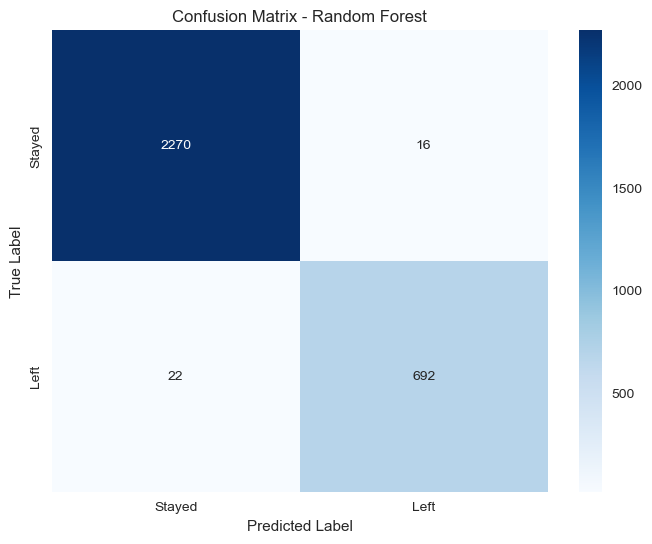

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Stayed', 'Left'], 
           yticklabels=['Stayed', 'Left'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

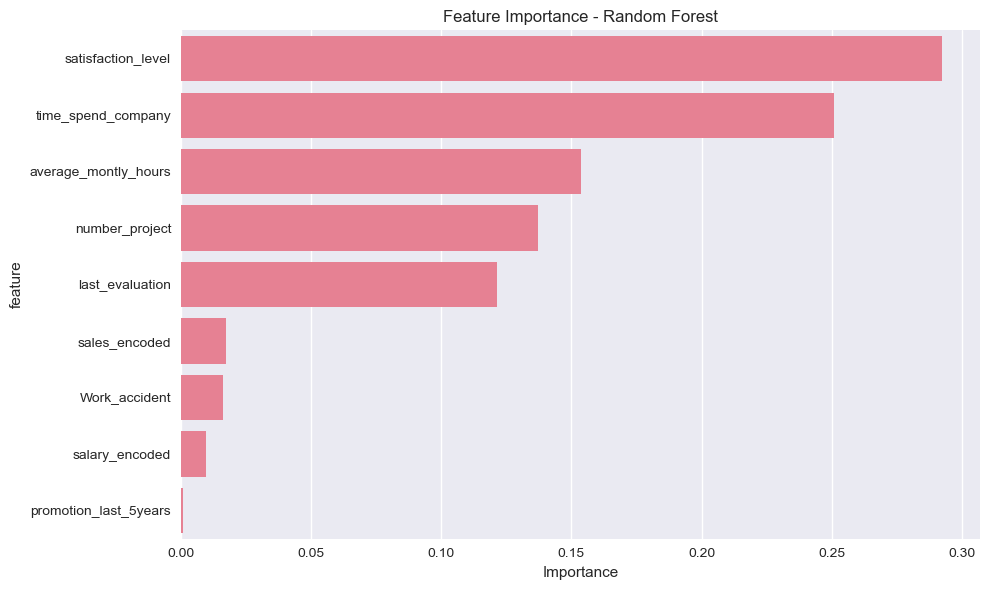


Top 5 Most Important Features:
                feature  importance
0    satisfaction_level    0.292339
4    time_spend_company    0.251052
3  average_montly_hours    0.153861
2        number_project    0.137143
1       last_evaluation    0.121439


In [20]:
# Feature importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 5 Most Important Features:")
    print(feature_importance.head())

## 10. Retention Strategy Recommendations

In [21]:
print("=" * 60)
print("RETENTION STRATEGY RECOMMENDATIONS")
print("=" * 60)

# Analyze high-risk employees
high_risk_employees = df[
    (df['satisfaction_level'] < 0.5) & 
    (df['average_montly_hours'] > 200) &
    (df['left'] == 0)  # Current employees
]

print(f"Number of high-risk current employees: {len(high_risk_employees)}")

# Strategy recommendations based on analysis
strategies = {
    "Low Satisfaction Employees": {
        "description": "Employees with satisfaction level < 0.5",
        "count": len(df[(df['satisfaction_level'] < 0.5) & (df['left'] == 0)]),
        "strategies": [
            "Conduct regular employee satisfaction surveys",
            "Implement flexible work arrangements",
            "Provide career development opportunities",
            "Improve work-life balance policies",
            "Enhance recognition and reward programs"
        ]
    },
    "Overworked Employees": {
        "description": "Employees working > 250 hours/month",
        "count": len(df[(df['average_montly_hours'] > 250) & (df['left'] == 0)]),
        "strategies": [
            "Implement workload management systems",
            "Hire additional staff to reduce workload",
            "Provide overtime compensation",
            "Set realistic project deadlines",
            "Encourage time-off utilization"
        ]
    },
    "Long-tenured Employees": {
        "description": "Employees with > 5 years tenure",
        "count": len(df[(df['time_spend_company'] > 5) & (df['left'] == 0)]),
        "strategies": [
            "Provide career advancement opportunities",
            "Implement mentorship programs",
            "Offer specialized training and certifications",
            "Create leadership development programs",
            "Provide competitive compensation packages"
        ]
    },
    "High Performers": {
        "description": "Employees with evaluation > 0.8",
        "count": len(df[(df['last_evaluation'] > 0.8) & (df['left'] == 0)]),
        "strategies": [
            "Implement performance-based bonuses",
            "Provide challenging projects",
            "Offer leadership opportunities",
            "Create fast-track promotion programs",
            "Provide competitive market compensation"
        ]
    },
    "Low Salary Employees": {
        "description": "Employees with low salary level",
        "count": len(df[(df['salary'] == 'low') & (df['left'] == 0)]),
        "strategies": [
            "Conduct salary benchmarking studies",
            "Implement performance-based raises",
            "Provide additional benefits and perks",
            "Create profit-sharing programs",
            "Offer equity or stock options"
        ]
    }
}

print("\nTargeted Retention Strategies:")
print("-" * 50)

for category, details in strategies.items():
    print(f"\n{category}:")
    print(f"  Target Group: {details['description']}")
    print(f"  Number of Employees: {details['count']}")
    print(f"  Recommended Strategies:")
    for i, strategy in enumerate(details['strategies'], 1):
        print(f"    {i}. {strategy}")

RETENTION STRATEGY RECOMMENDATIONS
Number of high-risk current employees: 845

Targeted Retention Strategies:
--------------------------------------------------

Low Satisfaction Employees:
  Target Group: Employees with satisfaction level < 0.5
  Number of Employees: 2036
  Recommended Strategies:
    1. Conduct regular employee satisfaction surveys
    2. Implement flexible work arrangements
    3. Provide career development opportunities
    4. Improve work-life balance policies
    5. Enhance recognition and reward programs

Overworked Employees:
  Target Group: Employees working > 250 hours/month
  Number of Employees: 1960
  Recommended Strategies:
    1. Implement workload management systems
    2. Hire additional staff to reduce workload
    3. Provide overtime compensation
    4. Set realistic project deadlines
    5. Encourage time-off utilization

Long-tenured Employees:
  Target Group: Employees with > 5 years tenure
  Number of Employees: 1073
  Recommended Strategies:
   

In [22]:
# Department-specific strategies
print(f"\nDepartment-Specific Strategies:")
print("-" * 40)

dept_turnover = df.groupby('sales')['left'].mean().sort_values(ascending=False)
for dept, turnover_rate in dept_turnover.items():
    print(f"\n{dept.upper()} Department (Turnover: {turnover_rate:.2%}):")
    if turnover_rate > 0.25:
        print("  - High turnover risk - implement immediate retention programs")
        print("  - Conduct exit interviews to understand reasons")
        print("  - Review compensation and benefits")
    elif turnover_rate > 0.15:
        print("  - Moderate turnover risk - monitor closely")
        print("  - Implement preventive retention measures")
    else:
        print("  - Low turnover risk - maintain current practices")


Department-Specific Strategies:
----------------------------------------

HR Department (Turnover: 29.09%):
  - High turnover risk - implement immediate retention programs
  - Conduct exit interviews to understand reasons
  - Review compensation and benefits

ACCOUNTING Department (Turnover: 26.60%):
  - High turnover risk - implement immediate retention programs
  - Conduct exit interviews to understand reasons
  - Review compensation and benefits

TECHNICAL Department (Turnover: 25.62%):
  - High turnover risk - implement immediate retention programs
  - Conduct exit interviews to understand reasons
  - Review compensation and benefits

SUPPORT Department (Turnover: 24.90%):
  - Moderate turnover risk - monitor closely
  - Implement preventive retention measures

SALES Department (Turnover: 24.49%):
  - Moderate turnover risk - monitor closely
  - Implement preventive retention measures

MARKETING Department (Turnover: 23.66%):
  - Moderate turnover risk - monitor closely
  - Implem

## 11. Summary and Conclusion

In [23]:
print("=" * 60)
print("SUMMARY AND CONCLUSION")
print("=" * 60)

# Create comprehensive summary
summary = f"""
EMPLOYEE TURNOVER ANALYTICS REPORT
==================================

Executive Summary:
- Total Employees Analyzed: {len(df):,}
- Overall Turnover Rate: {df['left'].mean():.2%}
- Key Factors Identified: Satisfaction Level, Work Hours, Evaluation Score

Data Quality Assessment:
✓ No missing values found
✓ Data types appropriate for analysis
✓ {df.duplicated().sum()} duplicate rows detected (retained for analysis)

Key Findings:
1. Employees with low satisfaction (< 0.5) are significantly more likely to leave
2. Overworked employees (> 250 hours/month) show higher turnover rates
3. Long-tenured employees (> 5 years) have different retention needs
4. High performers need special attention to prevent turnover

Model Performance:
- Best Model: {best_model_name}
- F1-Score: {results_df.loc[best_model_name, 'f1']:.4f}
- Accuracy: {results_df.loc[best_model_name, 'accuracy']:.4f}

Recommendations:
1. Implement satisfaction monitoring programs
2. Address workload management issues
3. Develop career advancement paths
4. Review compensation structures
5. Create department-specific retention strategies

This analysis provides actionable insights for reducing employee turnover
and improving organizational retention strategies.
"""

print(summary)

print("\n" + "=" * 60)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 60)
print("All objectives have been achieved:")
print("✓ Data quality checks performed")
print("✓ EDA completed with key insights")
print("✓ Clustering analysis performed")
print("✓ Class imbalance handled with SMOTE")
print("✓ K-fold cross-validation completed")
print("✓ Best model identified and evaluated")
print("✓ Retention strategies recommended")

SUMMARY AND CONCLUSION

EMPLOYEE TURNOVER ANALYTICS REPORT

Executive Summary:
- Total Employees Analyzed: 14,999
- Overall Turnover Rate: 23.81%
- Key Factors Identified: Satisfaction Level, Work Hours, Evaluation Score

Data Quality Assessment:
✓ No missing values found
✓ Data types appropriate for analysis
✓ 3008 duplicate rows detected (retained for analysis)

Key Findings:
1. Employees with low satisfaction (< 0.5) are significantly more likely to leave
2. Overworked employees (> 250 hours/month) show higher turnover rates
3. Long-tenured employees (> 5 years) have different retention needs
4. High performers need special attention to prevent turnover

Model Performance:
- Best Model: Random Forest
- F1-Score: 0.9733
- Accuracy: 0.9873

Recommendations:
1. Implement satisfaction monitoring programs
2. Address workload management issues
3. Develop career advancement paths
4. Review compensation structures
5. Create department-specific retention strategies

This analysis provides ac